## Data Preprocessing

Converting the Excel file containing the Tweet data into CSV and plain text files for ease of usage:

In [166]:
import os
os.chdir('/home/allomorph/Documents')

import pandas as pd 
xl_file = pd.ExcelFile('casestudy1.xlsx')
source = pd.read_excel(xl_file,sheet_name='2016_12_05-TrumpTwitterAll',index_col=None)
source.to_csv('casestudy.csv',encoding='utf-8',index=False)

import csv
with open('casestudy.txt','w') as outfile:
	with open('casestudy.csv','r') as infile:
		[outfile.write(" ".join(row)+"\n") for row in csv.reader(infile)]
	outfile.close()

text_body  = open('casestudy.txt').read()
print(text_body[:500])

# The text body looks like the output block below

Tweet
If the press would cover me accurately & honorably, I would have far less reason to "tweet." Sadly, I don't know if that will ever happen!
I am thrilled to nominate Dr. @RealBenCarson as our next Secretary of the US Dept. of Housing and Urban Development… https://t.co/OJKuDFhP3r
their country (the U.S. doesn't tax them) or to build a massive military complex in the middle of the South China Sea? I don't think so!
Did China ask us if it was OK to devalue their currency (making it hard for o


Here, I am running some data cleaning and preprocessing steps such a **Tokenization**, and **Noise Reduction**.

Since we have data scraped from Twitter, I am using the **TweetTokenizer** module from **NLTK**

In [168]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer(strip_handles=True,preserve_case=True)

tokens = tokenizer.tokenize(text_body)
print(tokens[:100])

# Outputting a small sample of the tokens extracted

['Tweet', 'If', 'the', 'press', 'would', 'cover', 'me', 'accurately', '&', 'honorably', ',', 'I', 'would', 'have', 'far', 'less', 'reason', 'to', '"', 'tweet', '.', '"', 'Sadly', ',', 'I', "don't", 'know', 'if', 'that', 'will', 'ever', 'happen', '!', 'I', 'am', 'thrilled', 'to', 'nominate', 'Dr', '.', 'as', 'our', 'next', 'Secretary', 'of', 'the', 'US', 'Dept', '.', 'of', 'Housing', 'and', 'Urban', 'Development', '…', 'https://t.co/OJKuDFhP3r', 'their', 'country', '(', 'the', 'U', '.', 'S', '.', "doesn't", 'tax', 'them', ')', 'or', 'to', 'build', 'a', 'massive', 'military', 'complex', 'in', 'the', 'middle', 'of', 'the', 'South', 'China', 'Sea', '?', 'I', "don't", 'think', 'so', '!', 'Did', 'China', 'ask', 'us', 'if', 'it', 'was', 'OK', 'to', 'devalue', 'their']


Upon examining the tokens extracted from the text, we can notice that there are too many _**Links**_ embedded in the text
as well as a lot of _**Hex Codes**_ from the usage of _**Emojis**_ in Tweets.

These kind of characters introduce noise in the text data, therefore I will remove them before further processing.

We can use a simple **regular expression to remove links and hex codes** from the text. 

In [169]:
import re

# noise_pattern variable has the Regex to match any noise in the text from links and hex codes 
# This Regex will match all shortened Twitter urls of the form //t.co followed by upto 10 alphanumberic characters
# as well as unicode encryption of any Emojis. 

# I am using a list comprehension to iterate through the tokens list


noise_pattern = re.compile("//t.co/\S{0,10}|https|http|_x.*_")
tokens = [word for word in tokens if not noise_pattern.search(word)]
print(tokens[:100])

['Tweet', 'If', 'the', 'press', 'would', 'cover', 'me', 'accurately', '&', 'honorably', ',', 'I', 'would', 'have', 'far', 'less', 'reason', 'to', '"', 'tweet', '.', '"', 'Sadly', ',', 'I', "don't", 'know', 'if', 'that', 'will', 'ever', 'happen', '!', 'I', 'am', 'thrilled', 'to', 'nominate', 'Dr', '.', 'as', 'our', 'next', 'Secretary', 'of', 'the', 'US', 'Dept', '.', 'of', 'Housing', 'and', 'Urban', 'Development', '…', 'their', 'country', '(', 'the', 'U', '.', 'S', '.', "doesn't", 'tax', 'them', ')', 'or', 'to', 'build', 'a', 'massive', 'military', 'complex', 'in', 'the', 'middle', 'of', 'the', 'South', 'China', 'Sea', '?', 'I', "don't", 'think', 'so', '!', 'Did', 'China', 'ask', 'us', 'if', 'it', 'was', 'OK', 'to', 'devalue', 'their', 'currency']


This completely removes all the noise from the text data but there are still a lot of punctuation marks in the tokens.
I will not remove them right away because punctuations are important for extracting sentence tokens from the text.
I will remove punctuations after **Sentence Tokenization**.

I am recompling all the tokens back into a body of text in order to extract sentence tokens from it.

In [9]:
text_body = ' '.join(tokens)

I am now going to extract sentences from the text using the **sent_tokenize module** in **NLTK**.

In [172]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text_body)

By examining the sentence tokens, we can see that a lot of punctuation marks also got tokenized as sentences. We need to **remove all the false positives** in order to keep the data salient. 

I am using Python's built-in **string module** to do that.

In [173]:
import string

sentences = ["".join(j for j in i if j not in string.punctuation) for i in  sentences]
print(sentences[:20])

['Tweet\nIf the press would cover me accurately  honorably I would have far less reason to tweet', 'Sadly I dont know if that will ever happen', 'I am thrilled to nominate Dr RealBenCarson as our next Secretary of the US Dept', 'of Housing and Urban Development… httpstcoOJKuDFhP3r\ntheir country the US doesnt tax them or to build a massive military complex in the middle of the South China Sea', 'I dont think so', 'Did China ask us if it was OK to devalue their currency making it hard for our companies to compete heavily tax our products going into', '', 'FoxNews will be rerunning Objectified Donald Trump the ratings hit produced by the great Harvey Levin of TMZ at 800 PM', 'Enjoy', 'The Green Party just dropped its recount suit in Pennsylvania and is losing votes in Wisconsin recount', 'Just a Stein scam to raise money', 'expensive mistake', 'THE UNITED STATES IS OPEN FOR BUSINESS\nthese companies are able to move between all 50 states with no tax or tariff being charged', 'Please be f

In [36]:
print(len(sentences))

18848


Since we now have our list of sentences without false positives, we can see that there are a total of **18848 sentences** in the text. Since we have **11425 tweets** in the data set, we can see that each tweet consists of roughly **1.65 sentences**. 

After removing all the punctuations, special characters and noise in the text, we can now use the text body to look at the frequency distributions in the text. I am using the **FreqDist class** from **NLTK** to do this.

In [19]:
from nltk import FreqDist

sentence_frequencies = FreqDist(sentences[:])

This returns a dictionary data structure populated with sentences and their frequencies.

In [182]:
import operator

for k,v in sorted(sentence_frequencies.items(), key=operator.itemgetter(1))[:5]:
    print(k,v)

tweet
if the press would cover me accurately  honorably i would have far less reason to tweet 1
sadly i dont know if that will ever happen 1
i am thrilled to nominate dr realbencarson as our next secretary of the us dept 1
did china ask us if it was ok to devalue their currency making it hard for our companies to compete heavily tax our products going into 1
foxnews will be rerunning objectified donald trump the ratings hit produced by the great harvey levin of tmz at 800 pm 1


Several of the sentence tokens in the data set are frequently reoccuring, this is especially true for shorter tweets.

I am extracting **5000 of the most common sentences** seen in this data set and appending to the variable documents.

In [32]:
documents = []

for i in range(len(sentence_frequencies.most_common(5000))):
    documents.append(sentence_frequencies.most_common(5000)[:][i][0])


Since we do not want one word sentences such as "Yes", "No", "Nice", "Great", etc., I am removing all the sentences from documents which have a length <= 5 characters. 

I am also converting all the text into lower case to remove any duplicates that occur due to case difference.

In [33]:
documents = [word.lower() for word in documents if len(word)>=5]

I am removing all the duplicates in the documents by casting the variable into set and back to list. This will give us out final set of tweets that we can make our model on, which is given in the tweets variable

In [183]:
tweets = list(set(documents))

print(tweets[:20])

['trump2016 supertuesday thank you tennessee ', 'americafirst thank you to our amazing law enforcement officers ', 'trump2016 make america great again ', 'we must beat crooked hillary ', 'my int ', 'hillary took money and did favors for regimes that enslave women and murder gays ', 'americafirst trumptrain last nights results  in poll taken by nbc ', 'how can crooked hillary say she cares about women when she is silent on radical islam  which horribly oppresses women ', 'wow  it is unbelievable how distorted  onesided and biased the media is against us ', 'i can fix it fast  hillary has no chance ', 'big wins last night  ', 'how can crooked hillary put her husband in charge of the economy when he was responsible for nafta  the worst economic deal in u ', 'he is not as smart as cruz  and may be an even bigger liar ', 'most importantly  she suffers from plain old bad judgement ', 'crookedhillary paytoplay join me in naples  florida this evening at 600 pm ', 'we will have much less expens

## N-gram Model of the Tweets :

To extract key phrases from the tweets that capture the essence of the data set, we need to make an N-gram model of the text data. 

N-grams are the contiguous sequence of n-items occuring next to each other in a body of text. For example, in a sentence like "The cow jumps over the moon" the 2-grams would be "the cow","cow jumps", "jumps over","over the","the moon".

Making a frequency based N-gram model will reveal to us which words commonly occur together in a sequence in the tweets.

I have written the **count_grams()** and **most_frequent_grams()** functions to extract N-grams from the tweets. This is a **native Python implementation of N-gram extraction** that makes use of simple data structures, string manipulation and logic with without making use of any libraries or packages. 

In [190]:
import collections

def count_grams(text,min_length,max_length):
    # I am using a dict data structure to count ngram frequencies
    lengths = range(min_length,max_length)
    grams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # this is a helper function to add grams to the queue
    def add_to_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current)>=length:
                grams[length][current[:length]] += 1

    for line in text:
        for word in tokenizer.tokenize(line):
            queue.append(word)
            if len(queue)>=max_length:
                add_to_queue()

    while len(queue)>min_length:
        queue.popleft()
        add_to_queue()

    return grams

def most_frequent_ngrams(grams,num=50):
    result = {}
    for n in sorted(ngrams):
        print('{} MOST COMMON {}-grams'.format(num,n))
        for gram,count in ngrams[n].most_common(num):
            result[' '.join(gram)] = count
            print('{0}: {1}'.format(' '.join(gram),count))
            print()
    return result

# I have taken a miminum of 2 grams(2 word sequence) and a maximum of 8 grams here.

ngrams = count_grams(tweets,2,8)

result = most_frequent_ngrams(ngrams)

50 MOST COMMON 2-grams
thank you: 403

trump 2016: 252

will be: 240

crooked hillary: 201

i will: 177

of the: 163

hillary clinton: 162

i am: 117

in the: 116

is a: 112

join me: 103

make america: 85

for the: 83

to be: 81

to the: 76

going to: 75

we will: 74

great again: 73

makeamericagreatagain trump: 67

it is: 64

america great: 63

’ s: 62

me in: 61

a great: 61

we are: 60

i have: 60

on the: 58

at the: 54

our country: 54

the people: 53

be interviewed: 51

all of: 50

ted cruz: 49

and the: 48

by the: 47

is the: 47

get out: 46

with the: 45

you for: 45

2016 thank: 45

that i: 42

new york: 42

the great: 42

she is: 40

the republican: 40

the media: 39

donald trump: 39

last night: 38

tonight at: 37

a big: 37

50 MOST COMMON 3-grams
i will be: 93

crooked hillary clinton: 75

makeamericagreatagain trump 2016: 65

america great again: 61

make america great: 60

join me in: 55

will be interviewed: 51

2016 thank you: 45

thank you for: 43

trump 2016 tha

From the above output, we can see that the result variable outputs 50 key, value pairs from 2-word upto 8-word sequences extracted from the text along with their frequencies. 

In [48]:
print(len(result.keys()))

650


A majority of these N-grams, although frequent, are not very salient in meaning. There are a lot of functional words in the text such as stop words which in themselves, do not carry much meaning. I did not remove stop words from the text because the task is to build a Phrase Cloud and there is a lot of meaning loss when the text has no stop words to connect Noun Phrases to Verb Phrases and so on. 

I have manually identified and collected the most **Meaningful Phrases** from the **most frequently occurring N-grams**. 

These phrases are all grammatically correct and consist of the **catch phrases** used in the tweets, meant to convey a message. 

I have done this in order to make the data visualisation in the Phrase Cloud powerful and to capture the essence of the dataset. 

In [58]:
phrases = ['thank you','trump 2016','we will', 'for president','we must','our country','thank you america',
'make america safe','will be back','join the movement','trump 2016 thank you','make america great again',
'you have my vote','to make america great','together we will make america great again','get out and vote',
'will not be forgotten','will make america great','copies of my book','i will be interviewed on','so much to talk about',
'it is time to draintheswamp','you have my vote', 'votetrump tomorrow','thank you new hampshire','thank you florida',
'go donald','defeat crooked hillary','god bless you','trump for president','i will beat hillary','crooked hillary is not qualified',
'we need change','i told you so','thank you  arizona','i will fix it','dumb as a rock','all talk no action',
'❌ libya ❌ syria ❌ iran ❌ iraq ❌ asia pivot ❌ russian reset ❌ benghazi', 'i will bring jobs back','close the deal with bernie',
'trump 2016 americafirst thank you','going to make america safe','a total waste of time','my thoughts and prayers',
'we will make america great','we will make america safe','will make america great again','i will be interviewed by','will be on tonight',
'lightweight senator marco rubio','in the history of','it is time to','i am the only','this is a movement','thank you to all',
'together we will make','america safe and great','four more years of','crooked hillary clinton is','the great state of',
'we are going to','look forward to','the media is','time to draintheswamp','the american people','the republican party',
'the united states','goofy elizabeth warren','last night','the republican','join me']

In [71]:
# Converting all the strings in each phrase to title case
phrases = [phrase.title() for phrase in phrases] 

# Concatenating all the strings into multiword phrases
phrases = [''.join(word.split(' ')) for word in phrases[:]]


## Phrase Cloud Generation

I am using the **wordcloud**, **matplotlib**, **numpy**, **Image** and **random** packages to customize and generate the Phrase Cloud.

I am customizing the Phrase Cloud to enhance the aesthetic and to make it look more visually appealing and powerful.

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image
import random

# Taking a logo and vectorizing it into a numpy array to give shape to the Phrase Cloud

logo = np.array(Image.open('twit_logo.jpg'))

# Converting the Phrases into natural text in order to input it to the wordcloud

text = ' '
for phrase in phrases:
    text += phrase + ' '


I have written a the function **choice_color_func()** to help customize the colour of font in the Phrase Cloud based on the HSL attributes(Hue, Saturation and Luminosity). We can choose whichever color we want our font to be by simply looking at the RGB values on an HTML color picker. We can pass this function as a parameter to the **recolor method** in the wordcloud package.

In [86]:
def choice_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 206.0 / 255.0)
    s = int(100.0 * 81.0 / 255.0)
    l = int(100.0 * float(random.randint(60, 100)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

I am also using a custom font for this cloud. Since Twitter uses **Helvetica Neue** as its default font, I am using the same font echo the theme of the cloud.

#### I have used the Twitter logo as a guide to give shape to the Phrase Cloud. 

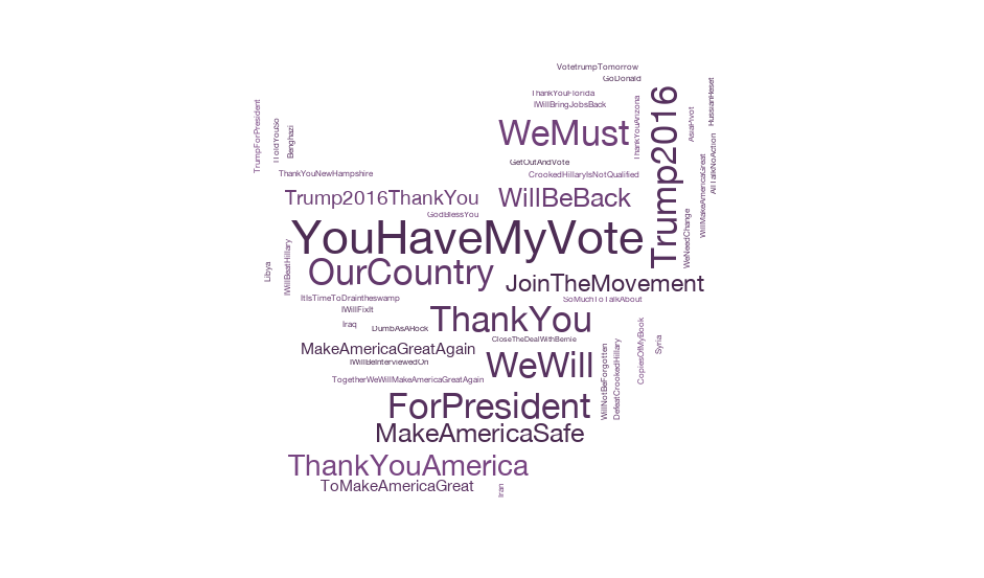

In [93]:
# Generating the Phrase Cloud with custom parameters

wordcloud = WordCloud(max_words=1600,width=1600,prefer_horizontal=0.5,height=1600,font_path = '/home/allomorph/Documents/HelveticaNeue.ttf',mask=logo, margin=10,background_color="white",
               random_state=1,min_font_size=7).generate(text)

# Recoloring the cloud to our chosen color

wordcloud.recolor(color_func=choice_color_func)

# Plotting the cloud with matplotlib
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation="bilinear")

plt.axis("off")
plt.show()

## Sentiment Analysis

To conduct a Sentiment Analysis on the Tweets I am first taking a simple approach to see how it compares against a robustly trained package like **TextBlob**. 

I am training my own classifier and built a simplistic Sentiment Analysis system using **NaiveBayesClassifier** from NLTK. 

## The Naive Bayes Approach

I am first extracting 2000 of the most common words from the body of text.

To do this I am extracting word tokens from the text using **TweetTokenizer** as I did before.

In [94]:
from collections import Counter
from string import punctuation

from nltk.corpus import stopwords

text = open('casestudy.txt').read()

from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True,preserve_case=True)

# Tokenizing the text just as I did before

word_tokens = tokenizer.tokenize(text)


For this task, I am  removing stopwords from the word tokens in order to extract more meaningful words from the text, as I am going to train my model on these words.

In [100]:
import string
from nltk.corpus import stopwords

punctuation = list(string.punctuation)
stopwords = list(set(stopwords.words('english')))
stopwords.extend(punctuation)


word_tokens = [word for word in word_tokens if word not in stopwords]

I am also removing links and hex codes from the word tokens as I did before with sentence tokens. I am removing false positives and words less than 3 characters long in order to extract more meaningful words as opposed to more frequent words. I am converting all words into lower case as well in order to remove duplicates. 

In [102]:
import re

# Removing links and hex codes

link_pattern = re.compile("//t.co/\S{0,10}|https|http|_x.*_")
tokens = [word for word in word_tokens if not link_pattern.search(word)]

# Removing small words and lower-casing

tokens = [word.lower() for word in tokens if len(word)>=2]

I am using **FreqDist** from NLTK to extract 2000 of the most frequent words among the word tokens. 

In [192]:
from nltk import FreqDist

word_freqs = FreqDist(tokens[:])

# Extracting 2000 of the most frequent words

common_words = []
for i in range(len(word_freqs.most_common(2000))):
    common_words.append(word_freqs.most_common(2000)[:][i][0])


I am going to **Parts-of-Speech Tag** all the words in the tokens list in order to extract the words that I need to train my classifier on.

PoS Tagging helps in identifying meaning relations between words in a text and can be crucial while performing tasks such as Sentiment Analysis. 

In [107]:
import nltk 

# PoS Tagging all the words 

tags = [nltk.pos_tag(word.split()) for word in common_words]

nltk.pos_tag returns a nested list of tuples containing each word and its PoS Tag. I am going to convert this nested list into a flat list for ease of use.

In [108]:
tags = [item for sublist in tags for item in sublist]

This is a sample of what they look like now :

In [109]:
print(tags[:50])

[('trump', 'NN'), ('great', 'JJ'), ('thank', 'NN'), ('the', 'DT'), ('america', 'NN'), ('#trump2016', 'NN'), ('donald', 'NN'), ('president', 'NN'), ('make', 'VB'), ('hillary', 'NN'), ('people', 'NNS'), ('we', 'PRP'), ('#makeamericagreatagain', 'NN'), ('new', 'JJ'), ('get', 'VB'), ('you', 'PRP'), ('would', 'MD'), ('vote', 'NN'), ('run', 'VB'), ('like', 'IN'), ('country', 'NN'), ('time', 'NN'), ('one', 'CD'), ('via', 'IN'), ('poll', 'NN'), ('again', 'RB'), ('clinton', 'NN'), ('big', 'JJ'), ('need', 'NN'), ('tonight', 'NN'), ('love', 'NN'), ('going', 'VBG'), ('...', ':'), ('will', 'MD'), ('back', 'RB'), ('thanks', 'NNS'), ('good', 'JJ'), ('never', 'RB'), ('he', 'PRP'), ('us', 'PRP'), ('see', 'VB'), ('show', 'NN'), ('win', 'NN'), ('many', 'JJ'), ('best', 'JJS'), ('today', 'NN'), ('last', 'JJ'), ('watch', 'NN'), ('want', 'NN'), ('mr', 'NN')]


#### From these tags I am going to **extract all the adjectives**. I am doing this because adjectives have a lot to do with the sentiment of a sentence. When we describe something as good or bad, the main meaning contribution to that description comes from the words 'good' and 'bad' which are both adjectives. They can be very useful especially while mining sentiments and opinions from user reviews and customer feedbacks. 

#### I am only taking adjectives here because I am keeping my model fairly simple. The model will me much more accurate if other parts of speech are included as well. 

In [113]:
adjectives = [tag[0] for tag in tags if tag[1]=='JJ']

print(len(adjectives))

print("-----")

print(adjectives)

144
-----
['great', 'new', 'big', 'good', 'many', 'last', 'much', 'bad', 'nice', 'true', 'american', 'real', 'live', 'next', 'republican', 'total', 'national', 'presidential', 'hard', 'fantastic', 'illegal', 'strong', 'tough', 'special', 'ready', 'terrible', 'happy', 'united', 'massive', 'safe', 'white', 'wrong', 'weak', 'political', 'major', 'little', 'open', 'old', 'incredible', 'low', 'false', '#crookedhillary', 'negative', 'horrible', 'huge', 'important', 'military', 'foreign', 'full', 'common', 'able', 'free', 'high', 'tremendous', 'successful', 'unbelievable', 'radical', 'second', 'general', 'serious', 'such', 'pathetic', 'small', 'mexican', 'easy', 'poor', 'islamic', 'whole', 'nuclear', 'private', 'dead', 'clear', 'conservative', 'legal', 'professional', 'stupid', 'nasty', 'final', 'grand', 'social', 'third', 'entire', 'angry', 'young', 'exclusive', 'former', 'possible', 'economic', 'hispanic', 'international', 'complete', 'rich', 'criminal', 'democratic', 'liberal', 'red', 'dor

I have extracted 144 adjectives from the word tokens, and now I am going to manually annotate them into three sentiment categories : **Positive, Negative and Neutral**

## Sentiment Annotation

##### Note : I used the best of my judgement while annotating these sentiments and tried not to skew the model by allowing for any prejudices.

In [114]:
# Positive Words

positive = ['great','good','good','many','nice','true','fantastic','strong','special','happy','incredible','big',
'major','massive','huge','important','able','free','high','tremendous','radical','serious','easy','legal','grand'
,'positive','legendary','large','powerful','fabulous','independent','interested']

# Neutral Words

neutral = ['new','much','american','real','live','next','republican','total','national','presidential','ready','united',
'safe','white','political','open','old','foreign','full','common','unbelievable','second','general','such',
'mexican','islamic','whole','nuclear','private','clear','conservative','professional','social',
 'third','entire','young','exclusive','former','democratic','liberal','red','potential','southern','short',
 'daily','due','black','different','global','financial','available','personal','syrian', 
 'native','various', 'natural', 'atlantic','original', 'local','usual', 'current','impressed', 'popular',
 'single', 'average', 'eastern','british', 'annual', 'wide', 'expensive']

# Negative Words

negative = ['last','bad','hard','illegal','tough','terrible','wrong','weak','little','low','false',
'crooked','negative','horrible','pathetic','small','poor','dead','stupid','nasty','final','angry','criminal',
'ineffective','rid','ridiculous','dangerous','one-sided', 'guilty','unable', 'limited',]


## Feature Extraction 

I am writing a simple helper function to convert each word into a feature, in this case, the feature is sentiment, namely : pos, neg or neu

This returns each word and its sentiment feature.

In [123]:
def word_features(words):
    return dict([(word, True) for word in words])

In [138]:
# Extracting features 

positive_features = [(word_features(pos), 'pos') for pos in positive]

negative_features = [(word_features(neg), 'neg') for neg in negative]

neutral_features = [(word_features(neu), 'neu') for neu in neutral]


I am going to use these to train the classifier for all three sentiments.

In [139]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import names

training_set = negative_features + positive_features + neutral_features
 
classifier = NaiveBayesClassifier.train(training_set)

I am writing the **analyse_sentiment()** function to compute the net sentiment of any sentence given as input to the function call.

In [140]:
def analyse_sentiment(sentence):
    neg = 0
    pos = 0
    neu = 0
    sentence = sentence.lower()
    words = sentence.split(' ')
    for word in words:
        classResult = classifier.classify( word_features(word))
        if classResult == 'neg':
            neg += 1
        if classResult == 'pos':
            pos += 1
        if classResult == 'neu':
            neu += 1

 
    print('Positive: ' + str(float(pos)/len(words)))
    print('Negative: ' + str(float(neg)/len(words)))
    print('Neutral: ' + str(float(neu)/len(words)))

    return "-----"

I am going to extract sentence tokens, remove links, hex codes and punctuations and convert all the sentences to lower case as I did before.

After this process, I will iteratively run the **analyse_sentiment()** function on all the sentences.

In [141]:
from nltk.tokenize import sent_tokenize
import string

sentence_tokens = sent_tokenize(text)
filtered_sentences = [i for i in sentence_tokens if not link_pattern.search(i)]
filtered_sentences = ["".join(j for j in i if j not in string.punctuation) for i in filtered_sentences]
filtered_sentences = [i.lower() for i in filtered_sentences]
for i in filtered_sentences:
    if len(i.split())<3:
        filtered_sentences.remove(i)

sentence_frequencies = FreqDist(filtered_sentences)

top = []
for i in range(len(sentence_frequencies.most_common(150))):
    top.append(sentence_frequencies.most_common(150)[:][i][0])

I am removing any sentence token that is less than 3 words long, in order to make the model more salient.

In [142]:
for sentence in top:
    if len(sentence.split())<3:
        top.remove(sentence)

In [130]:
print(top)

['make america great again', 'let’s make america great again', 'lets make america great again', 'see you soon', 'i will work hard and never let you down', 'we will make america great again', 'will be back soon', 'thank you for your support', 'thank you america', 'we must put americafirst', 'see you there', 'we need you', 'look forward to it', 'together we will make america great again', 'i told you so', 'dont miss it', 'i dont think so', 'thank you ohio', 'together we will makeamericagreatagain', 'get yours today', 'keep up the great work', 'thank you iowa', 'so much to talk about', 'we need trump', 'you have my vote', 'this is a movement', 'i will be back soon', 'proud of you', 'thank you indiana', 'thank you for the nice words', 'i love you', 'thank you illinois', 'we will make america safe  great again', 'trump2016 thank you', 'trump for president', 'never give up', 'entrepreneurs negotiation is an art', 'treat it like one', 'learn to focus on what will give results', 'get out and v

The above output block shows all the top sentences extracted from the tweets. Now I am going to analyse each of their sentiment.

In [163]:
for sentence in top:
    print(sentence)
    print()
    print(analyse_sentiment(sentence))

make america great again

Positive: 0.25
Negative: 0.25
Neutral: 0.5
-----
let’s make america great again

Positive: 0.2
Negative: 0.2
Neutral: 0.6
-----
lets make america great again

Positive: 0.2
Negative: 0.2
Neutral: 0.6
-----
see you soon

Positive: 0.0
Negative: 0.0
Neutral: 1.0
-----
i will work hard and never let you down

Positive: 0.0
Negative: 0.1111111111111111
Neutral: 0.8888888888888888
-----
we will make america great again

Positive: 0.16666666666666666
Negative: 0.16666666666666666
Neutral: 0.6666666666666666
-----
will be back soon

Positive: 0.0
Negative: 0.25
Neutral: 0.75
-----
thank you for your support

Positive: 0.0
Negative: 0.2
Neutral: 0.8
-----
thank you america

Positive: 0.0
Negative: 0.3333333333333333
Neutral: 0.6666666666666666
-----
we must put americafirst

Positive: 0.0
Negative: 0.0
Neutral: 1.0
-----
see you there

Positive: 0.0
Negative: 0.0
Neutral: 1.0
-----
we need you

Positive: 0.0
Negative: 0.0
Neutral: 1.0
-----
look forward to it

Positiv

From the above output, it is apparent that the classifier is not very accurate. There are several false positives, for example:

thank you arizona

Positive: 0.0
Negative: 0.3333333333333333
Neutral: 0.6666666666666666  

For the sentiment for 'thank you arizona' is like this whereas the sentiment for 'thank you new hampshire' is slightly more on the Neutral side like this :

thank you new hampshire

Positive: 0.0
Negative: 0.25
Neutral: 0.75

This is because 'new' is annotated as Neutral and the model does not treat New Hampshire as a Named Entity. 

These inaccuracies have arised because of restricting the model to adjectives. A more robust model would be to include all PoS Tags but that requires a long time for manual sentiment annotation, which is why I did not undertake it. Or if we have a sentiment annotated data set, it can be fitted more easily using a classifier like Naive Bayes. 

The inaccuraries are not per say because of the inefficiancy of the Naive Bayes Classifier but because of skew in our data. 

## The TextBlob Approach

To make things simpler, we can use a robust and heavily trained package already available for Python such as TextBlob.

In [144]:
from textblob import TextBlob

In [161]:
sentence_sentiment = 0

num_sentences = 0

net_sentiment = 0

for sentence in top:
    blob = TextBlob(sentence)
    sentence_sentiment = blob.sentiment.polarity
    print(sentence_sentiment)
    num_sentences += 1
    net_sentiment += sentence_sentiment
    
    ratio = net_sentiment/num_sentences*100
    print(sentence)
    print('Ratio = '+str(ratio))
    print('--------')
    

0.8
make america great again
Ratio = 80.0
--------
0.8
let’s make america great again
Ratio = 80.0
--------
0.8
lets make america great again
Ratio = 80.00000000000001
--------
0.0
see you soon
Ratio = 60.00000000000001
--------
-0.22361111111111115
i will work hard and never let you down
Ratio = 43.527777777777786
--------
0.8
we will make america great again
Ratio = 49.606481481481495
--------
0.0
will be back soon
Ratio = 42.51984126984128
--------
0.0
thank you for your support
Ratio = 37.20486111111112
--------
0.0
thank you america
Ratio = 33.070987654320994
--------
0.0
we must put americafirst
Ratio = 29.763888888888896
--------
0.0
see you there
Ratio = 27.058080808080813
--------
0.0
we need you
Ratio = 24.803240740740748
--------
0.0
look forward to it
Ratio = 22.89529914529915
--------
0.8
together we will make america great again
Ratio = 26.974206349206355
--------
0.0
i told you so
Ratio = 25.17592592592593
--------
0.0
dont miss it
Ratio = 23.60243055555556
--------
0.0


From the above output block, we can see that TextBlob rightly marks sentences like 'make america great again' with a 0.80 for sentiment, because it is indeed a positive sentence when taken as a standalone sentence out of any context.